# Import Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Read Data & Exploration

In [ ]:
df = pd.read_csv("Al Sabiya steam  power plant in Kuwait.csv")

In [ ]:
# Display the first few rows
print(df.head())

   temperature  pressure  flow  running_hours  alerts  status
0         60.0       2.0  0.70            800       0  normal
1         60.5       2.1  0.71           1150       0  normal
2         61.0       2.2  0.72           1500       0  normal
3         61.5       2.3  0.73           1850       0  normal
4         62.0       2.4  0.74           2200       0  normal


In [ ]:
# Check data types
print(df.dtypes)

temperature      float64
pressure         float64
flow             float64
running_hours      int64
alerts             int64
status            object
dtype: object


In [ ]:
# Summary statistics
print(df.describe())

       temperature     pressure         flow  running_hours       alerts
count  1188.000000  1188.000000  1188.000000    1188.000000  1188.000000
mean     71.633838     2.470707    73.913636    5037.904040     0.227273
std      11.762112     1.028155    89.614369    2448.719983     0.419247
min      60.000000     0.800000     0.700000     800.000000     0.000000
25%      63.500000     1.180000     0.840000    2900.000000     0.000000
50%      67.000000     2.600000     1.070000    5000.000000     0.000000
75%      81.000000     3.300000   164.000000    7450.000000     0.000000
max     100.000000     4.000000   236.000000    8410.000000     1.000000


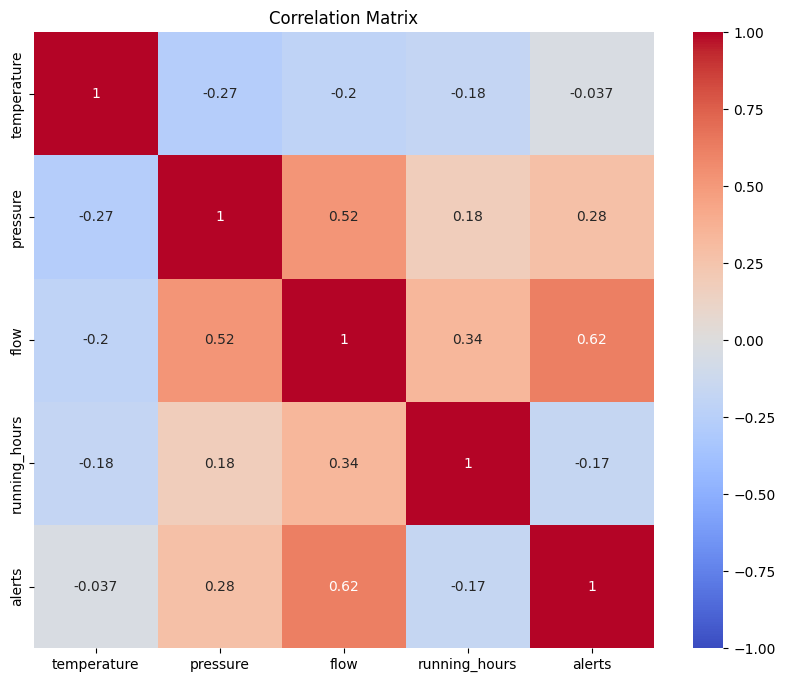

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (you would replace this with your actual data)
data = {
    'temperature': [21.1, 23.5, 19.8, 22.0, 20.5],
    'pressure': [1.2, 1.1, 1.3, 1.1, 1.2],
    'flow': [150, 160, 155, 145, 150],
    'running_hours': [100, 200, 150, 300, 250],
    'alerts': [2, 1, 3, 0, 1],
    'status': ['abnormal', 'annual maintenance', 'early maintenance', 'normal']
}


# Dropping non-numeric columns
numeric_df = df.drop(columns=['status'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Encode target labels
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [ ]:
# Print the mapping of labels
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
print("Label mapping:", label_mapping)

Label mapping: {0: 'abnormal', 1: 'annual maintenance', 2: 'early maintenance', 3: 'normal'}


In [ ]:
# Split features and target variable
X = df.drop("status", axis=1)
y = df["status"]

In [ ]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Splits the dataset into 80.05% training data and 19.95% test

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19889, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Verify the split percentages
total_samples = df.shape[0]
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_percentage:.2f}%)")
print(f"Test samples: {test_samples} ({test_percentage:.2f}%)")

Total samples: 1188
Training samples: 951 (80.05%)
Test samples: 237 (19.95%)


# Train Models

## SVM

In [ ]:
# Train SVM with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)
svm_model = grid.best_estimator_
print(f"Best parameters for SVM: {grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svm)}\n")

SVM Accuracy: 0.95
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        85
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        52
           3       0.78      1.00      0.88        47

    accuracy                           0.95       237
   macro avg       0.95      0.96      0.95       237
weighted avg       0.96      0.95      0.95       237




In [ ]:
comparison_df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})

# Map numerical labels to their original string labels
actual_labels_svm = comparison_df_svm['Actual'].map(label_mapping)
predicted_labels_svm = comparison_df_svm['Predicted'].map(label_mapping)

# Create a DataFrame for comparison with string labels
comparison_df_svm_mapped = pd.DataFrame({'Actual': actual_labels_svm, 'Predicted': predicted_labels_svm})
print(f"SVM Predictions vs Actual (Mapped):\n{comparison_df_svm_mapped.head(10)}\n")

SVM Predictions vs Actual (Mapped):
                  Actual           Predicted
319    early maintenance   early maintenance
1156            abnormal            abnormal
907             abnormal            abnormal
86              abnormal            abnormal
936             abnormal            abnormal
458             abnormal            abnormal
1050            abnormal            abnormal
678             abnormal            abnormal
323   annual maintenance  annual maintenance
361   annual maintenance  annual maintenance



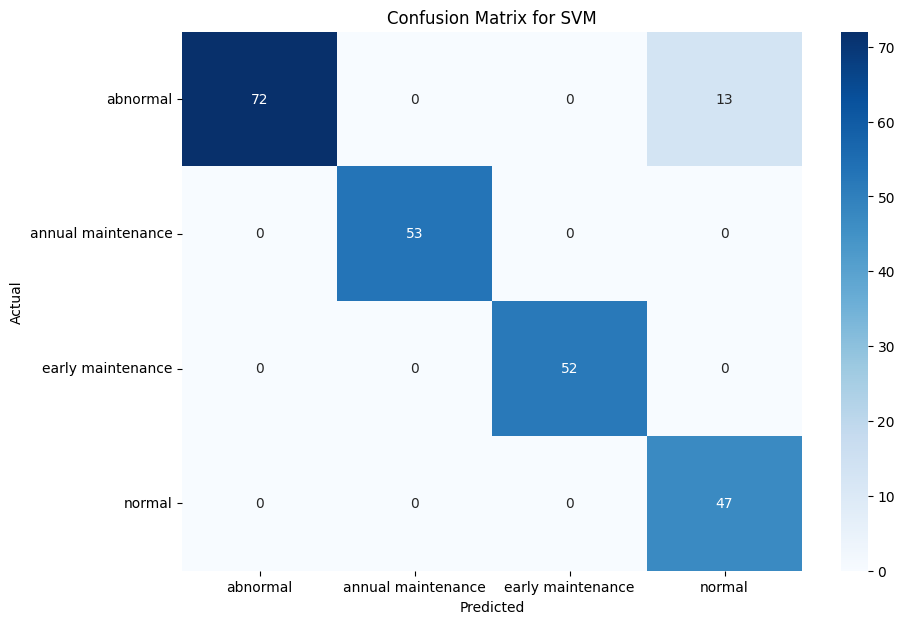

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

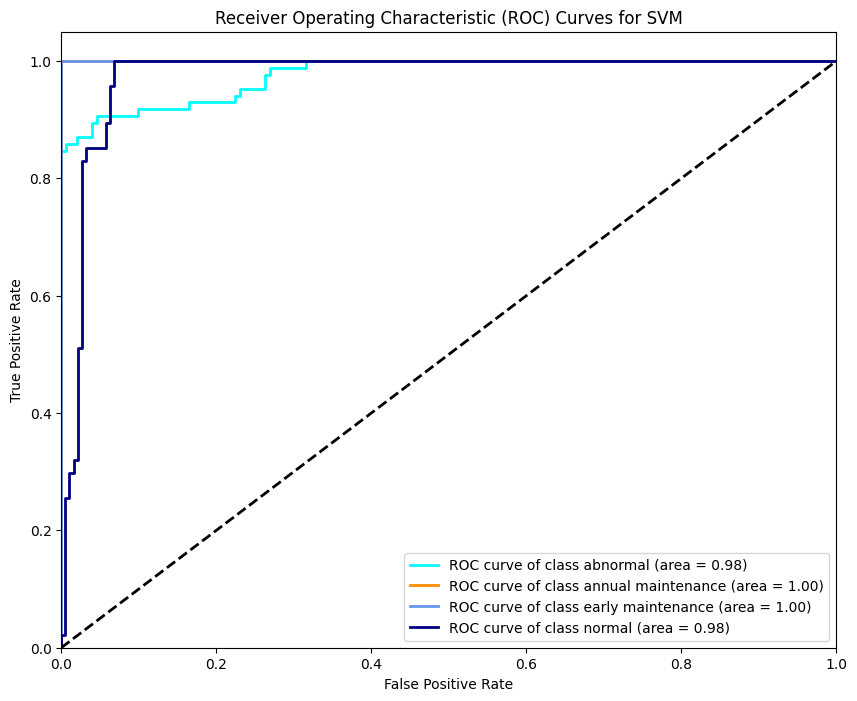

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
n_classes = y_test_binarized.shape[1]

# Compute predicted probabilities
y_score = svm_model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'deeppink', 'green', 'red', 'blue', 'yellow', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for SVM')
plt.legend(loc="lower right")
plt.show()


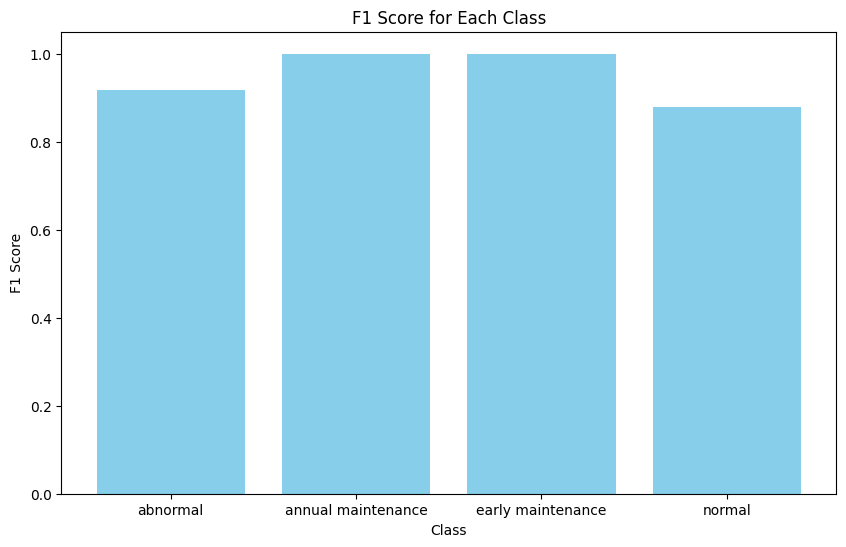

In [ ]:
from sklearn.metrics import f1_score

# Compute F1 score for each class
f1_scores = dict()
for i in range(n_classes):
    f1_scores[i] = f1_score(y_test, y_pred_svm, labels=[i], average=None)

# Plot F1 score for each class
plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), [f1_scores[i][0] for i in range(n_classes)], color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.xticks(range(n_classes), label_encoder.classes_)
plt.show()


## KNN

In [ ]:
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"KNN Classification Report:\n{classification_report(y_test, y_pred_knn)}\n")

KNN Accuracy: 0.93
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89        85
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        52
           3       0.77      0.91      0.83        47

    accuracy                           0.93       237
   macro avg       0.93      0.94      0.93       237
weighted avg       0.94      0.93      0.93       237




In [ ]:
# Compare predictions with actual values
comparison_df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

# Map numerical labels to their original string labels
actual_labels_knn = comparison_df_knn['Actual'].map(label_mapping)
predicted_labels_knn = comparison_df_knn['Predicted'].map(label_mapping)

# Create a DataFrame for comparison with string labels
comparison_df_knn_mapped = pd.DataFrame({'Actual': actual_labels_knn, 'Predicted': predicted_labels_knn})
print(f"KNN Predictions vs Actual (Mapped):\n{comparison_df_knn_mapped.head(10)}\n")

KNN Predictions vs Actual (Mapped):
                  Actual           Predicted
319    early maintenance   early maintenance
1156            abnormal            abnormal
907             abnormal            abnormal
86              abnormal            abnormal
936             abnormal            abnormal
458             abnormal            abnormal
1050            abnormal            abnormal
678             abnormal            abnormal
323   annual maintenance  annual maintenance
361   annual maintenance  annual maintenance



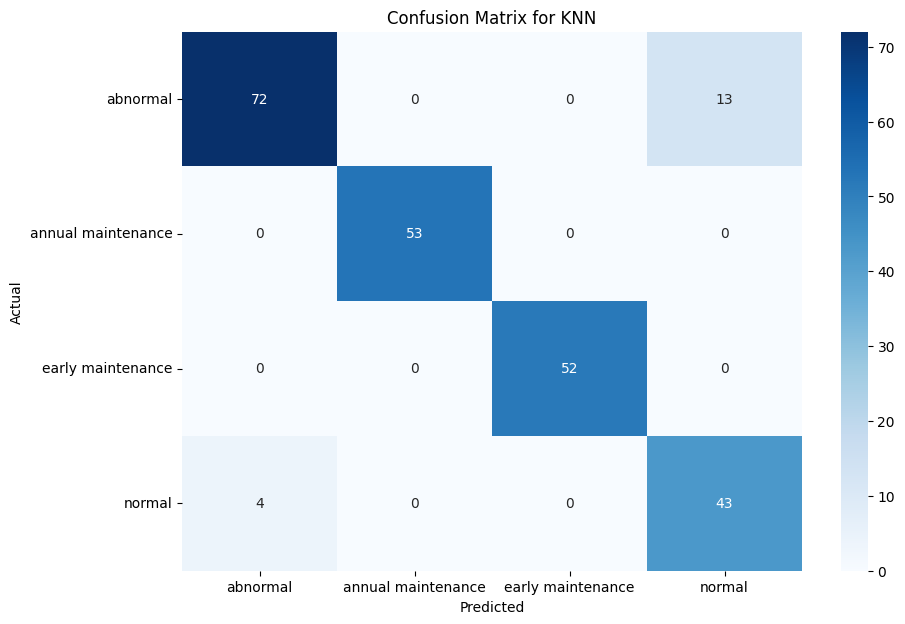

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

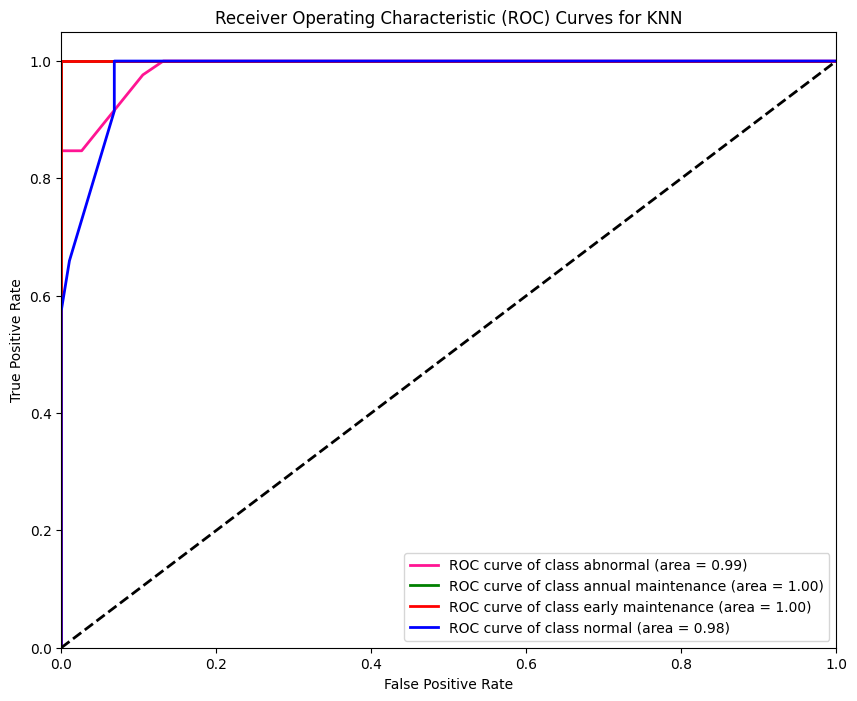

In [ ]:
# Compute predicted probabilities
y_score_knn = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_binarized[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = roc_auc_score(y_test_binarized[:, i], y_score_knn[:, i])

# Plotting the ROC curves for KNN
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc_knn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for KNN')
plt.legend(loc="lower right")
plt.show()


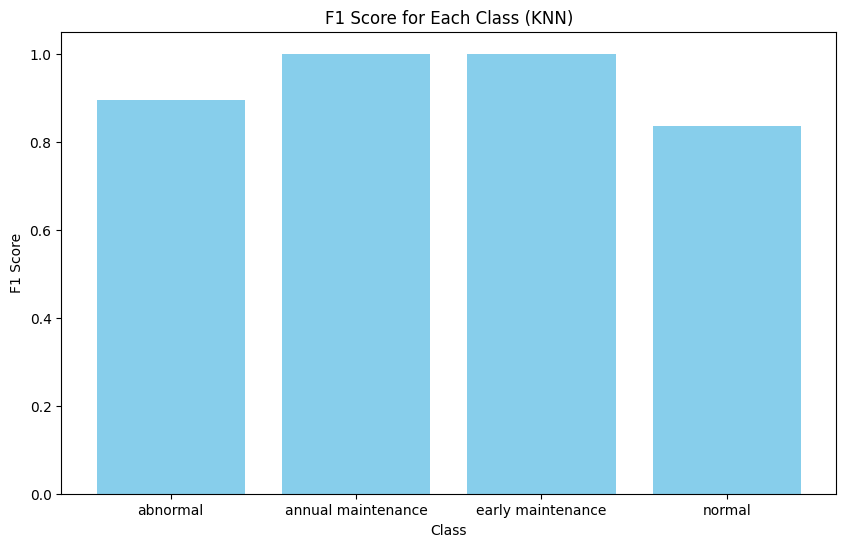

In [ ]:
# Compute F1 score for each class with KNN
f1_scores_knn = dict()
for i in range(n_classes):
    f1_scores_knn[i] = f1_score(y_test, y_pred_knn, labels=[i], average=None)

# Plot F1 score for each class as a bar plot for KNN
plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), [f1_scores_knn[i][0] for i in range(n_classes)], color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class (KNN)')
plt.xticks(range(n_classes), label_encoder.classes_)
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of SVM and KNN classifiers
svm_classifier = SVC(**grid.best_params_)  # Using best parameters from grid search
knn_classifier = KNeighborsClassifier()
ensemble_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('knn', knn_classifier)], voting='hard')

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Evaluate the ensemble model
accuracy_test_ensemble = ensemble_classifier.score(X_test, y_test)

print(f"Ensemble Test Accuracy: {accuracy_test_ensemble:.2f}")


Ensemble Test Accuracy: 0.93


In [ ]:
from sklearn.metrics import classification_report

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_classifier.predict(X_test)

# Generate classification report for the ensemble model
classification_report_ensemble = classification_report(y_test, y_pred_ensemble)

# Print the classification report for the ensemble model
print("Classification Report for Ensemble Model:\n", classification_report_ensemble)

Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89        85
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        52
           3       0.77      0.91      0.83        47

    accuracy                           0.93       237
   macro avg       0.93      0.94      0.93       237
weighted avg       0.94      0.93      0.93       237



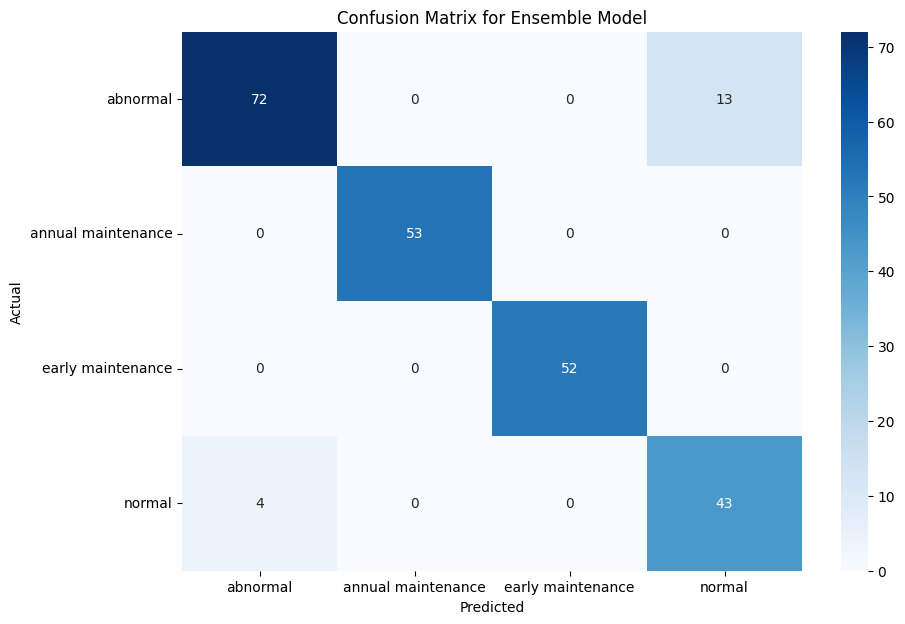

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for the ensemble model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

In [ ]:
# Create a DataFrame for comparison with ensemble predictions and actual values
comparison_df_ensemble = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ensemble})

# Map numerical labels to their original string labels
actual_labels_ensemble = comparison_df_ensemble['Actual'].map(label_mapping)
predicted_labels_ensemble = comparison_df_ensemble['Predicted'].map(label_mapping)

# Create a DataFrame for comparison with string labels
comparison_df_ensemble_mapped = pd.DataFrame({'Actual': actual_labels_ensemble, 'Predicted': predicted_labels_ensemble})

# Print the comparison DataFrame
print("Ensemble Predictions vs Actual (Mapped):\n", comparison_df_ensemble_mapped.head(10))

Ensemble Predictions vs Actual (Mapped):
                   Actual           Predicted
319    early maintenance   early maintenance
1156            abnormal            abnormal
907             abnormal            abnormal
86              abnormal            abnormal
936             abnormal            abnormal
458             abnormal            abnormal
1050            abnormal            abnormal
678             abnormal            abnormal
323   annual maintenance  annual maintenance
361   annual maintenance  annual maintenance


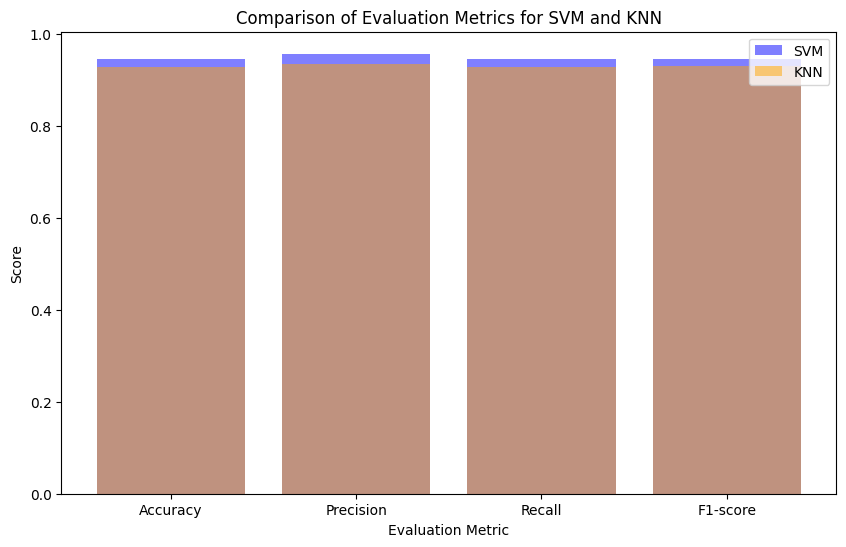

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Calculate recall scores for SVM and KNN
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Calculate precision scores for SVM and KNN
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

# Calculate F1 scores for SVM and KNN
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Define evaluation metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Plot bar plots for evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, svm_metrics, color='blue', alpha=0.5, label='SVM')
plt.bar(metrics, knn_metrics, color='orange', alpha=0.5, label='KNN')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics for SVM and KNN')
plt.legend()
plt.show()

# Saving the Models

In [ ]:
import joblib

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save the KNN model
joblib.dump(knn_model, 'knn_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

# Loading the Models


In [ ]:
# Load the saved SVM model
svm_model_loaded = joblib.load('svm_model.pkl')

# Load the saved KNN model
knn_model_loaded = joblib.load('knn_model.pkl')

# Load the scaler
scaler_loaded = joblib.load('scaler.pkl')

# Load the label encoder
label_encoder_loaded = joblib.load('label_encoder.pkl')


# Making Predictions with the Loaded Models


In [ ]:
import pandas as pd

# Example new input data (replace with your actual data)
new_input_data = pd.DataFrame({
    'temperature': [21.5],
    'pressure': [1.2],
    'flow': [150],
    'running_hours': [120],
    'alerts': [2]
})

# Preprocess the new input data
new_input_data_scaled = scaler_loaded.transform(new_input_data)

# Make predictions with the loaded SVM model
svm_predictions_loaded = svm_model_loaded.predict(new_input_data_scaled)
svm_predicted_labels_loaded = label_encoder_loaded.inverse_transform(svm_predictions_loaded)

# Make predictions with the loaded KNN model
knn_predictions_loaded = knn_model_loaded.predict(new_input_data_scaled)
knn_predicted_labels_loaded = label_encoder_loaded.inverse_transform(knn_predictions_loaded)

# Print the predictions
print("SVM Predictions for the new input data:", svm_predicted_labels_loaded)
print("KNN Predictions for the new input data:", knn_predicted_labels_loaded)


SVM Predictions for the new input data: ['abnormal']
KNN Predictions for the new input data: ['early maintenance']


In [ ]:
# Load the models
svm_model = joblib.load('svm_model.pkl')
knn_model = joblib.load('knn_model.pkl')

# Example input data (replace with your actual data)
new_input_data = np.array([[21.5, 1.2, 150, 120, 2]])

In [ ]:
# Measure latency for SVM model
num_runs = 100
total_time_svm = 0

for _ in range(num_runs):
    start_time = time.time()
    svm_model.predict(new_input_data)
    end_time = time.time()
    total_time_svm += (end_time - start_time)

average_latency_svm = (total_time_svm / num_runs) * 1000  # Convert to milliseconds

# Measure latency for KNN model
total_time_knn = 0

for _ in range(num_runs):
    start_time = time.time()
    knn_model.predict(new_input_data)
    end_time = time.time()
    total_time_knn += (end_time - start_time)

average_latency_knn = (total_time_knn / num_runs) * 1000  # Convert to milliseconds

# Print the average latency for both models
print(f"Average Latency for SVM: {average_latency_svm:.2f} ms")
print(f"Average Latency for KNN: {average_latency_knn:.2f} ms")

Average Latency for SVM: 0.43 ms
Average Latency for KNN: 2.17 ms


# Apply TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import time
import os

In [ ]:

# Example neural network for demonstration purposes
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 2s 10ms/step - loss: 1.1428 - accuracy: 0.5878 - val_loss: 0.9015 - val_accuracy: 0.6245
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.7277 - val_loss: 0.5735 - val_accuracy: 0.7173
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7529 - val_loss: 0.4432 - val_accuracy: 0.6962
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.7676 - val_loss: 0.3856 - val_accuracy: 0.8608
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.9317 - val_loss: 0.3108 - val_accuracy: 0.9451
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.9464 - val_loss: 0.2589 - val_accuracy: 0.9367
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9464 - val_loss: 0.1961 - val_accuracy: 0.9451
Epoch 8/100


In [ ]:
# Save the model
model.save('saved_model/my_model')

# Path to the saved model
model_path = 'saved_model/my_model'

# Calculate the size of the model directory
def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Get the size in bytes
model_size = get_directory_size(model_path)
print(f"Model size: {model_size} bytes")

# Example input data (replace with your actual data)
new_input_data = np.array([[21.5, 1.2, 150, 120, 2]], dtype=np.float32)

# Measure inference time over multiple runs to get an average latency
num_runs = 100
total_time = 0

for _ in range(num_runs):
    start_time = time.time()
    model.predict(new_input_data)
    end_time = time.time()
    total_time += (end_time - start_time)

average_latency = (total_time / num_runs) * 1000  # Convert to milliseconds

# Print the average latency
print(f"Average Latency: {average_latency:.2f} ms")

Model size: 225904 bytes
1/1 [==============================] - 0s 20ms/step
Average Latency: 129.88 ms


In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy[1]:.2f}")

8/8 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9451
Neural Network Accuracy: 0.95


# Convert the model to TensorFlow Lite

In [ ]:
import tensorflow as tf
import numpy as np
import time
import os
import joblib
import pandas as pd

In [ ]:
# Assuming the model has already been trained and saved, convert it to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_file = 'model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

# Function to evaluate the TFLite model
def evaluate_tflite_model(tflite_model_path, X_test, y_test):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Prepare the input data
    X_test = np.array(X_test, dtype=np.float32)

    # Evaluate the model
    predictions = []
    for i in range(X_test.shape[0]):
        interpreter.set_tensor(input_details[0]['index'], [X_test[i]])
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        predictions.append(output)

    # Convert predictions to class labels
    predictions = np.array(predictions).squeeze()
    predictions = np.argmax(predictions, axis=1)

    # Ensure y_test is in the correct format
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        true_labels = np.argmax(y_test, axis=1)
    else:
        true_labels = y_test

    # Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    return accuracy

# Evaluate TFLite model
tflite_accuracy = evaluate_tflite_model(tflite_model_file, X_test, y_test)
print(f'TFLite Model Accuracy: {tflite_accuracy:.2f}')

TFLite Model Accuracy: 0.95


In [ ]:
# Get the size of the TensorFlow Lite model
tflite_model_size = os.path.getsize(tflite_model_path)
print(f"TensorFlow Lite model size: {tflite_model_size} bytes")

TensorFlow Lite model size: 25388 bytes


In [ ]:
# Load the TensorFlow Lite model
tflite_model_path = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Example input data (replace with your actual data)
new_input_data = np.array([[21.5, 1.2, 150, 120, 2]], dtype=np.float32)

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], new_input_data)

# Measure inference time
start_time = time.time()
interpreter.invoke()
end_time = time.time()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Calculate the latency
latency = end_time - start_time

# Print the output and latency

print(f"TF Lite Latency: {latency * 1000:.2f} ms")  # Convert latency to milliseconds

TF Lite Latency: 0.13 ms
